## Questions

If someone is stopped, can we predict the probability that they will be frisked?

Is someone is stopped, can we predict the probability that they will be arrested?

If someone is stopped and frisked, can we predict the probability that they will be arrested?

How can we minimize the damage that this unconstitional law inflicts on its citizens?

What observed characteristics lead to arrests?

We chose to look at features that were only available to the officer before the stop was initiated.

Our objective is to maximize the precision of stop and frisks procduces.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
import data_cleaner as dc
import data_modeler as dm
import importlib

importlib.reload(dc)
importlib.reload(dm)
np.random.seed(5)

In [4]:
df = dc.load_full_sqf()

In [5]:
# df = dc.load_full_sqf(force=True)

In [6]:
# filespecs = dc.load_filespecs()
# pd.options.display.max_rows=112
# pd.options.display.max_colwidth=100
# pd.options.display.max_columns=113
# filespecs[2016][['Variable', 'Label']]

Only looked at a 0.1% of the data. We limited our features to data that could only be determined before the stop was initiated.

In [9]:
df_sample = df.sample(frac=.001)
X_pre_so = df_sample[dm.PRE_STOP_OBSERVABLES]
y = df_sample.arstmade

# Brake up the data into categorical features and Y/N features
X_category = X_pre_so.select_dtypes(include='category')
X_yn = X_pre_so.select_dtypes(include='int8')

# Fill in missing values in X_category and one hot encode categorical features.
X_cat_nonan = dm.fill_NaNs(X_category) # fills in NaNs
X_ohe, ohe_feat_names = dm.categorical_encoder(X_cat_nonan)
X_ohe_df = pd.DataFrame(X_ohe.toarray())
X_ohe_df.columns = ohe_feat_names

# Merge X_ohe and X_yn
X_mergred = np.concatenate((X_ohe_df, X_yn), axis = -1)
all_names = ohe_feat_names.tolist() + X_yn.columns.tolist()

# Split data
merged_split = dm.load_split(X_mergred, y, stratify=y)

# run RF
merged_rf = dm.run_rf(merged_split, max_depth=2)

"""Make predictions"""
predictions = merged_rf.predict(merged_split['X_train'])
"""Check the accuracy of your model"""
print(balanced_accuracy_score(merged_split['y_train'], predictions))

"""Make predictions"""
predictions = merged_rf.predict(merged_split['X_test'])
"""Check the accuracy of your model"""
print(balanced_accuracy_score(merged_split['y_test'], predictions))


# run log
lgsplit, lg  = dm.split_and_logit(X_mergred, y)

print(balanced_accuracy_score(lgsplit['y_train'], lg.predict(lgsplit['X_train'])))
print(balanced_accuracy_score(lgsplit['y_test'], lg.predict(lgsplit['X_test'])))

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5877183713722175
0.5150834742180896
Train
 0    3327
1     462
Name: arstmade, dtype: int64
0    0.878068
1    0.121932
Name: arstmade, dtype: float64
Test
 0    1016
1     247
Name: arstmade, dtype: int64
0    0.804434
1    0.195566
Name: arstmade, dtype: float64
0.8923922205797916
0.5613100312588803


Merge X_ohe and X_yn

In [10]:
X_mergred = np.concatenate((X_ohe_df, X_yn), axis = -1)

In [11]:
all_names = ohe_feat_names.tolist() + X_yn.columns.tolist()

In [12]:
merged_split = dm.load_split(X_mergred, y, stratify=y)
merged_rf = dm.run_rf(merged_split, max_depth=2)

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
rf_feature_df = pd.DataFrame([merged_rf.feature_importances_], columns=all_names)
pd.options.display.max_rows=77
rf_feature_df.T.sort_values(0)

,0
x0_F,0.000000
x1_63-E,0.000000
x1_63-F,0.000000
x1_63-G,0.000000
x1_63-H,0.000000
...,...
ac_time,0.068113
offunif,0.071751
cs_casng,0.098272
x9_Wednesday,0.100557


In [42]:
max(rf_feature_df)

'x9_Wednesday'

In [41]:
min(rf_feature_df)

'ac_incid'

In [46]:
rf_feature_df.drop(0)

,x0_F,x0_M,x0_Z,x1_1-,x1_1-A,x1_1-B,x1_1-C,x1_1-E,x1_1-F,x1_1-G,...,cs_furtv,cs_casng,cs_drgtr,ac_incid,ac_stsnd,cs_objcs,offunif,cs_cloth,cs_other,cs_vcrim


In [37]:
"""Make predictions"""
predictions = merged_rf.predict(merged_split['X_train'])
"""Check the accuracy of your model"""
print(balanced_accuracy_score(merged_split['y_train'], predictions))

0.5988148069878839


In [15]:
"""Make predictions"""
predictions = merged_rf.predict(merged_split['X_test'])
"""Check the accuracy of your model"""
print(balanced_accuracy_score(merged_split['y_test'], predictions))

0.5848848267117498


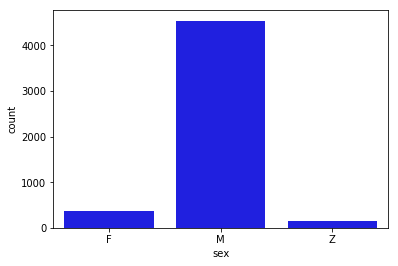

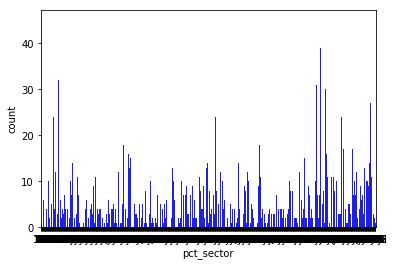

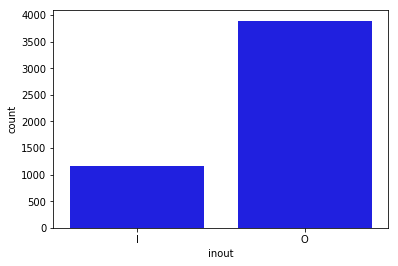

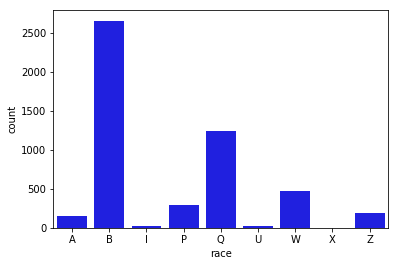

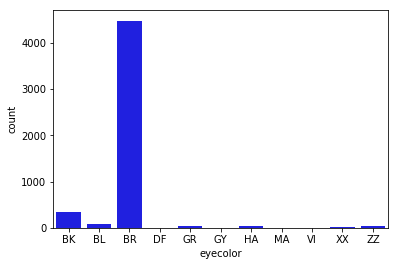

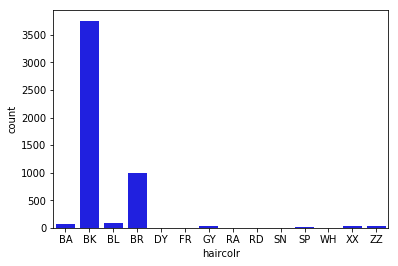

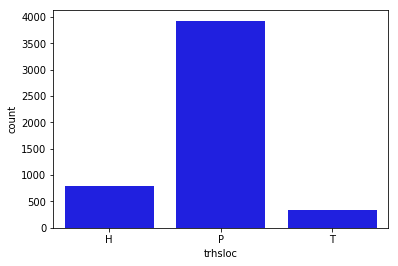

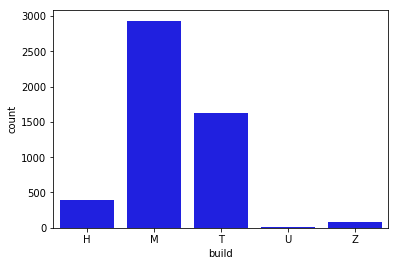

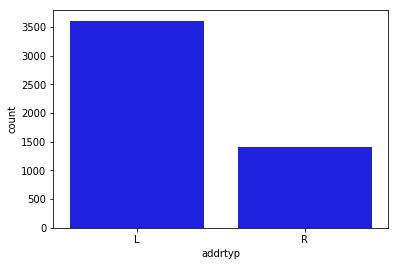

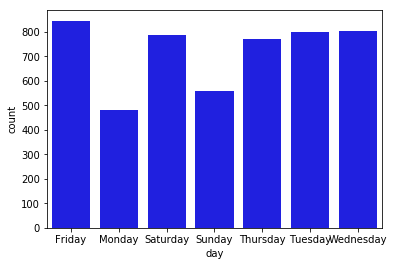

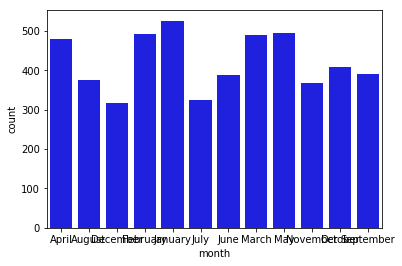

In [23]:
#df1 = df.select_dtypes([np.int, np.float])

for i, col in enumerate(X_category.columns):
    plt.figure(i)
    sns.countplot(x=col, data=X_category, color="b")

In [30]:
sns.barplot(x='sex', data=X_category, color="b")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

TypeError: unsupported operand type(s) for /: 'str' and 'int'

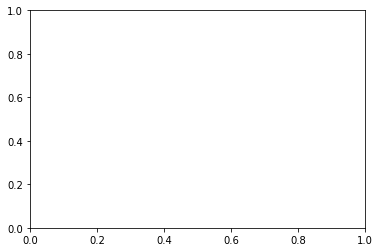

In [27]:
sns.distplot(X_category['sex'])

In [ ]:
lgsplit, lg  = dm.split_and_logit(X_mergred, y)

In [36]:
print(balanced_accuracy_score(lgsplit['y_train'], lg.predict(lgsplit['X_train'])))
balanced_accuracy_score(lgsplit['y_test'], lg.predict(lgsplit['X_test']))

0.8756095163417817


0.5792582535066713

# Everything after this point is garbage

## Data Cleaning

zeros were used to fill in missing data.

The data was separated into pre-stop features and during-stop features

In [9]:
df_sample = df.sample(frac=.01)
df_sample.columns

Index(['year', 'pct', 'ser_num', 'datestop', 'timestop', 'recstat', 'inout',
       'trhsloc', 'perobs', 'crimsusp',
       ...
       'dettypcm', 'linecm', 'detailcm', 'datetimestop', 'height', 'wepfound',
       'forceuse', 'month', 'day', 'detail1_'],
      dtype='object', length=118)

In [10]:
X_category = df_sample.select_dtypes(include='category')
y = df_sample.arstmade
X_category.head()

,recstat,inout,trhsloc,typeofid,officrid,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,rescode,city,sector,dettypcm,forceuse,month,day
3657824,A,O,P,P,NaN,NaN,NaN,M,B,BK,BR,T,R,NaN,BRONX,T,CM,NaN,NaN,NaN
1884111,A,I,NaN,P,NaN,NaN,NaN,M,B,BK,BR,M,L,NaN,MANHATTAN,J,CM,NaN,NaN,NaN
4174492,1,I,T,V,I,V,S,M,B,BK,BR,T,R,NaN,MANHATTAN,F,CM,NaN,NaN,NaN
1497686,A,O,NaN,P,NaN,V,S,M,W,BL,BL,M,L,NaN,QUEENS,K,CM,NaN,NaN,NaN
2073468,A,O,NaN,P,NaN,NaN,NaN,M,W,GY,BL,M,L,NaN,QUEENS,E,CM,NaN,NaN,NaN


In [12]:
X_yn = df_sample.select_dtypes(include='int8')
X_yn.head()

,explnstp,othpers,arstmade,sumissue,offunif,frisked,searched,contrabn,adtlrept,pistol,...,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,wepfound
3657824,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1884111,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4174492,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1497686,1,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2073468,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
merged_split = dm.load_split(X_ohe_df, y, stratify=y)
merged_rf = dm.run_rf(merged_split)
merged_rf.feature_importances_

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.        , 0.        , 0.        , 0.12522809, 0.        ,
       0.03404644, 0.00372565, 0.00248739, 0.03915427, 0.        ,
       0.        , 0.        , 0.01539468, 0.        , 0.        ,
       0.        , 0.        , 0.00150529, 0.        , 0.        ,
       0.        , 0.14217938, 0.02959635, 0.        , 0.        ,
       0.011777  , 0.        , 0.        , 0.        , 0.00451466,
       0.        , 0.        , 0.06355916, 0.08270336, 0.04746247,
       0.        , 0.        , 0.04818323, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03735241, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0480778 , 0.09267573, 0.04809112,
       0.12228553, 0.        ])

In [11]:
X_cat_nonan = dm.fill_NaNs(X_category) # fills in NaNs
X_ohe = dm.categorical_encoder(X_cat_nonan) # One-hot encodes and fit_transforms

In [211]:
# encoder.get_feature_names()

In [215]:
SD_split = dm.load_split(X_ohe, y, stratify=y)

In [216]:
def run_rf(split, **kwargs):
    """run random forest
good defaults: solver='saga', penalty='l1', max_iter=4000"""
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_sample(split['X_train'], split['y_train']) 
    rf = RandomForestClassifier(max_depth=2)
    rf.fit(X_train_resampled, y_train_resampled)
    return rf

In [217]:
SD_rf = run_rf(SD_split)
SD_rf

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [220]:
importlib.reload(dm)
SD_rf = dm.run_rf(SD_split)
SD_rf

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [218]:
SD_rf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.04843267,
       0.        , 0.12388989, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00508404, 0.        , 0.07752745, 0.        ,
       0.09610462, 0.        , 0.02978267, 0.        , 0.00120612,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0945771 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06190992, 0.        ,
       0.07712812, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00234777, 0.        , 0.05907976, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00772282, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [133]:
"""Transform your data"""
#X_model = X_model.reshape(-1, 1)
#X_model = X_model.toarray()


"""Optional: Hot encode your categorical data"""
#encoder = preprocessing.OneHotEncoder()
#X_model = encoder.fit_transform(X_model)
"""Split your code"""

X_train, X_test, y_train, y_test = train_test_split(X_category_nona, y,
                                                    stratify=y)
"""Pipeline"""
"""Optional: Scale your numerical training data"""
#scaler = StandardScaler()

"""Optional: Perform over or under sampling techniques here"""
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
"""Declare your model"""
#clf = svm.SVC()
#clf.fit(X_train, y_train)

rf = RandomForestClassifier(max_depth=2)
rf.fit(X_train, y_train)
print(rf.feature_importances_)
rf_feature_df = pd.DataFrame([rf.feature_importances_], columns=encoder.get_feature_names().tolist())
#print(clf.predict([[0, 0, 0, 0]]))
"""Do a grid search"""
#parameters = {'param_1': ('option_1', 'option_2'), 'param_2':[1, 10, 100], ...}
#model_tuned = GridSearchCV(model, parameters, cv=5)
#model_tuned.fit(X_train, y_train)


"""Make predictions"""
predictions = rf.predict(X_test)
"""Check the accuracy of your model"""
print(balanced_accuracy_score(y_test, predictions))

[0.         0.         0.00844523 0.         0.         0.04383786
 0.         0.05966516 0.         0.07265088 0.03215144 0.00200409
 0.         0.         0.03083676 0.         0.         0.
 0.         0.04328193 0.         0.         0.         0.02407044
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03399767 0.         0.
 0.0251278  0.         0.         0.         0.03556214 0.
 0.         0.         0.         0.         0.00901606 0.10063131
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.08367829 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04608461
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.09155477 0.001755
 0.         0.         0.         0.         0.0162644  0.
 0.         0.         0.06424732 0.         0.         0.
 0.1133605

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [146]:
pd.options.display.max_rows=135
rf_feature_df.T

,0
x0_1,0.000000
x0_9,0.000000
x0_A,0.008445
x0_APP,0.000000
x0_NoVal,0.000000
x1_I,0.043838
x1_NoVal,0.000000
x1_O,0.059665
x2_H,0.000000
x2_NoVal,0.072651


In [89]:
# # Feature Engineering
# df_sample['height'] = 12*df_sample['ht_feet'] + df_sample['ht_inch']
# df_sample = df_sample.drop(columns=['ht_feet', 'ht_inch'])
# df_sample.columns

In [16]:
# Drop columns that are missing a lot of data
dropped_columns = ['month', 'day', 'forceuse', 'detail1_', 'arstoffn', 'officrid',
                  'offverb', 'offshld', 'rescode', 'premtype', 'aptnum', 'state',
                  'zip', 'beat', 'post', 'crimsusp', 'stinter', 'stname', 'crossst',
                  'premname', 'sumoffen', 'othfeatr', 'addrnum', 'repcmd','dob',
                  'revcmd', 'datetimestop']
df_sample = df.sample(frac=.001)
df_sample = df_sample.drop(columns=dropped_columns)
y = df_sample.arstmade
X = df_sample.drop(columns='arstmade')
X_category = X.select_dtypes(include ='category')
categories = X_category.columns.to_list()
X_non_category = X.drop(columns=categories)

In [79]:
#df1 = df.select_dtypes([np.int, np.float])

# for i, col in enumerate(X_category_nona.columns):
#     plt.figure(i)
#     sns.countplot(x=col, data=X_category_nona)

Based on selected features, can we predict the probability of someone being arrested?

In [23]:
y.value_counts()

0    4796
1     290
Name: arstmade, dtype: int64

In [26]:
# Only works if there are no NaNs
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# sel.fit_transform(X_non_category)
# sel

In [29]:
# for feature in X_non_category.columns:
#     print(X_non_category['feature'].value_counts())

### Let's try modeling the categorical data

In [25]:
df_model = df_sample[['eyecolor', 'sex', 'arstmade']]
df_model = df_model.dropna()
X_model = df_model[['eyecolor', 'sex']]
y_model = df_model['arstmade']
print(len(y_model))
X_model

encoder = preprocessing.OneHotEncoder()
X_model = encoder.fit_transform(X_model)

5086


In [93]:
"""Transform your data"""
#X_model = X_model.reshape(-1, 1)
#X_model = X_model.toarray()


"""Optional: Hot encode your categorical data"""
#encoder = preprocessing.OneHotEncoder()
#X_model = encoder.fit_transform(X_model)
"""Split your code"""

X_train, X_test, y_train, y_test = train_test_split(X_model, y_model,
                                                    stratify=y_model)
"""Pipeline"""
"""Optional: Scale your numerical training data"""
#scaler = StandardScaler()

"""Optional: Perform over or under sampling techniques here"""
#from imblearn.over_sampling import SMOTE
#smt.SMOTE()
#X_train, y_train = smt.fit_sample(X_train, y_train)
"""Declare your model"""
#clf = svm.SVC()
#clf.fit(X_train, y_train)

rf = RandomForestClassifier(max_depth=2)
rf.fit(X_train, y_train)
#rf.feature_importances_
#RandomForestClassifier(max_depth=2, random_state=0)
print(rf.feature_importances_)
#print(clf.predict([[0, 0, 0, 0]]))
"""Do a grid search"""
#parameters = {'param_1': ('option_1', 'option_2'), 'param_2':[1, 10, 100], ...}
#model_tuned = GridSearchCV(model, parameters, cv=5)
#model_tuned.fit(X_train, y_train)


"""Make predictions"""
predictions = rf.predict(X_test)
"""Check the accuracy of your model"""
print(accuracy_score(y_test, predictions))

NameError: name 'X_model' is not defined

In [27]:
y

4870252    0
2615585    0
1564042    0
791830     0
1225627    0
          ..
3373136    0
1442388    0
4787054    0
209046     0
2844916    0
Name: arstmade, Length: 5086, dtype: int8

### Race Key Resource

https://www.icpsr.umich.edu/icpsrweb/NACJD/studies/21660/datadocumentation#

A Asian/Pacific Islander

B Black

I American Indian/Alaskan Native

P Black-Hispanic

Q White-Hispanic

W White

X Unknown

Z Other

## Haircolor Key Resource
https://www.icpsr.umich.edu/icpsrweb/NACJD/studies/21660/datadocumentation#

BA Bald

BK Black

BL Blond

BR Brown

GY Gray

RD Red

SP Salt and Pepper

WH White

XX Unknown

ZZ Other

## Eyecolor Key Resource
https://www.icpsr.umich.edu/icpsrweb/NACJD/studies/21660/datadocumentation#

BK Black

BL Blue

BR Brown

DF Two Different

GR Green

GY Gray

XX Unknown

ZZ Other

## Build Key Resource
https://www.icpsr.umich.edu/icpsrweb/NACJD/studies/21660/datadocumentation#

H Heavy

M Medium

T Thin

U Muscular

Z Unknown